In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import nltk
from nltk.tag import pos_tag
from nltk.stem import WordNetLemmatizer

In [52]:
# Load datasets
Fake_news = pd.read_csv('Fake.csv')
Real_news = pd.read_csv('True.csv') 

In [53]:
#Fake_new information
Fake_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [55]:
Fake_news.describe()

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


In [56]:
#Sample of fake_news dataset
Fake_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [57]:
Real_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [58]:
Real_news.describe()

,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


In [59]:
#Sample of Real news dataset
Real_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


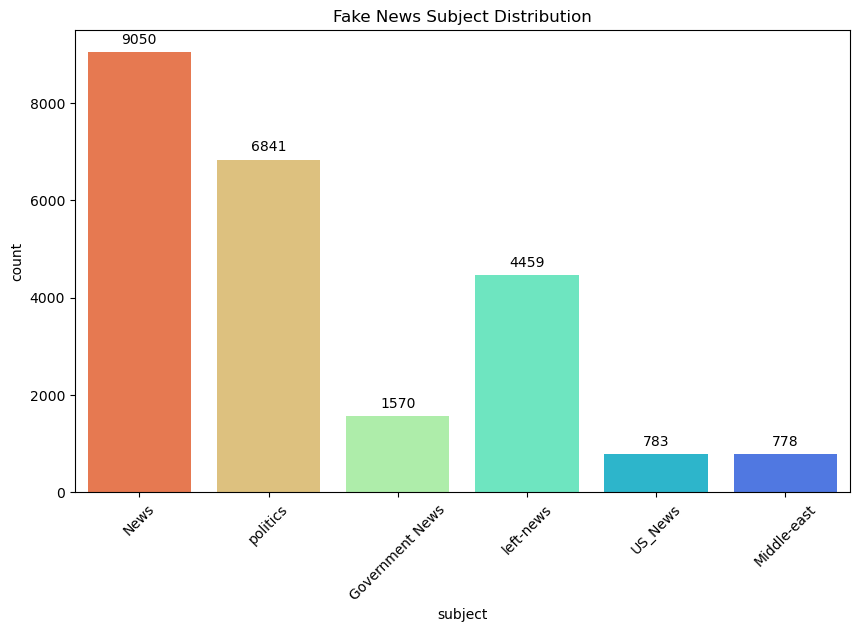

In [60]:
# Subject distribution
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=Fake_news, x='subject', palette ='rainbow_r', hue='subject' )
plt.title('Fake News Subject Distribution')
plt.xticks(rotation=45)

# Adding exact numbers on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.show()

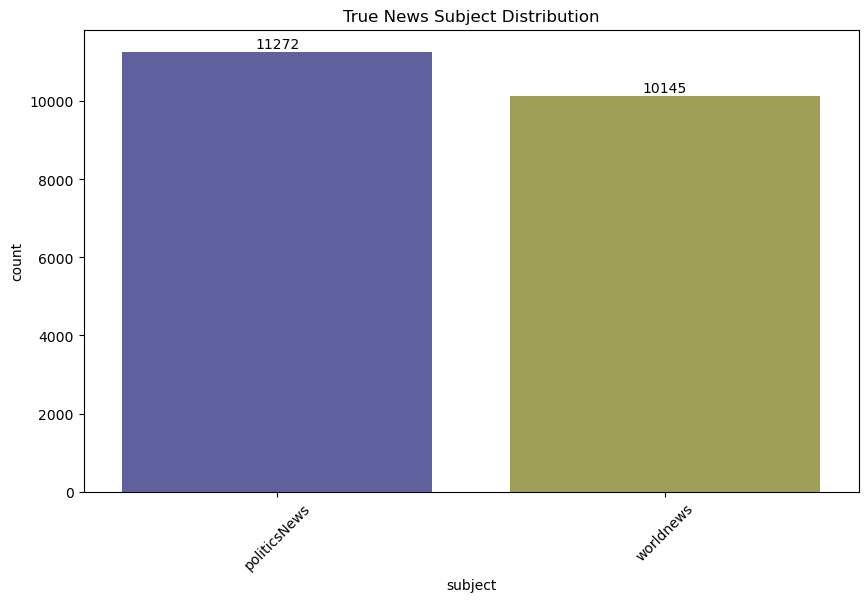

In [61]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=Real_news, x='subject', palette ='gist_stern', hue='subject' )
plt.title('True News Subject Distribution')
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points')


In [62]:
#Join the title and text together in fake news
Fake_news['news'] = Fake_news['title'] +' '+ Fake_news['text']
Fake_news.head()

,title,text,subject,date,news
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Donald Trump Sends Out Embarrassing New Year’...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Drunk Bragging Trump Staffer Started Russian ...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Sheriff David Clarke Becomes An Internet Joke...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Trump Is So Obsessed He Even Has Obama’s Name...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Pope Francis Just Called Out Donald Trump Dur...


In [63]:
#Join the title and text together in real news
Real_news['news'] = Real_news['title'] +' '+ Real_news['text']
Real_news.tail()

,title,text,subject,date,news
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",'Fully committed' NATO backs new U.S. approach...
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",LexisNexis withdrew two products from Chinese ...
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",Minsk cultural hub becomes haven from authorit...
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",Vatican upbeat on possibility of Pope Francis ...
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",Indonesia to buy $1.14 billion worth of Russia...


In [64]:
# Classify the news
Fake_news['class']= 0
Real_news['class']= 1

In [97]:
# Join the datasets together
FR = pd.concat([Fake_news, Real_news])

In [98]:
# Dataset columns
FR.columns

Index(['title', 'text', 'subject', 'date', 'news', 'class'], dtype='object')

In [99]:
# Feature extraction 
fr = FR[['news', 'class']]
fr.head()

,news,class
0,Donald Trump Sends Out Embarrassing New Year’...,0
1,Drunk Bragging Trump Staffer Started Russian ...,0
2,Sheriff David Clarke Becomes An Internet Joke...,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,0
4,Pope Francis Just Called Out Donald Trump Dur...,0


In [68]:
# Sample dataset
fr = fr.sample(frac = 1)
fr.head()

,news,class
9934,WOW! POPE FRANCES Tells Journalists That Peopl...,0
14900,SNIVELING COWARDS AT CNN Caught Editing Trump ...,0
7506,Factbox: Clean energy faces vote in four state...,1
1301,"Trump says open to bilateral Canada, Mexico pa...",1
1468,KKK Style Mob Chants “Russia Is Our Friend” W...,0


In [69]:
fr.reset_index(drop=True, inplace=True)
fr.head()


,news,class
0,WOW! POPE FRANCES Tells Journalists That Peopl...,0
1,SNIVELING COWARDS AT CNN Caught Editing Trump ...,0
2,Factbox: Clean energy faces vote in four state...,1
3,"Trump says open to bilateral Canada, Mexico pa...",1
4,KKK Style Mob Chants “Russia Is Our Friend” W...,0


In [70]:
# Display real news
fr[fr['class'] == 1]

,news,class
2,Factbox: Clean energy faces vote in four state...,1
3,"Trump says open to bilateral Canada, Mexico pa...",1
5,"Congo military plane crashes in Kinshasa, kill...",1
12,German police secure nail-filled package found...,1
18,Fight over electoral district boundaries heads...,1
...,...,...
44884,Trump on Twitter (Dec 18) - Congressional Race...,1
44886,Lebanon's grand mufti calls for national unity...,1
44890,Shot and dumped by a pigsty: a schoolboy kille...,1
44893,Reporter files criminal charge of battery agai...,1


In [71]:
# Display fake news
fr[fr['class'] == 0]

,news,class
0,WOW! POPE FRANCES Tells Journalists That Peopl...,0
1,SNIVELING COWARDS AT CNN Caught Editing Trump ...,0
4,KKK Style Mob Chants “Russia Is Our Friend” W...,0
6,LIVE FEED: PRESIDENT TRUMP IN TENNESSEE: Nashv...,0
7,NYT Fact-Checked Donald In Real-Time And It W...,0
...,...,...
44891,Watch The Harrowing Video of The Israeli Mili...,0
44892,WATCH: Trump Supporter HAMMERS Trump For Comm...,0
44894,HILLARY PAYS Professional Trolls $1 MILLION To...,0
44895,Eric Trump Tries To Defend Donald On Tax Evas...,0


In [72]:
# Count of news group by class
cc = fr.groupby('class').count()
print(cc)

        news
class       
0      23481
1      21417


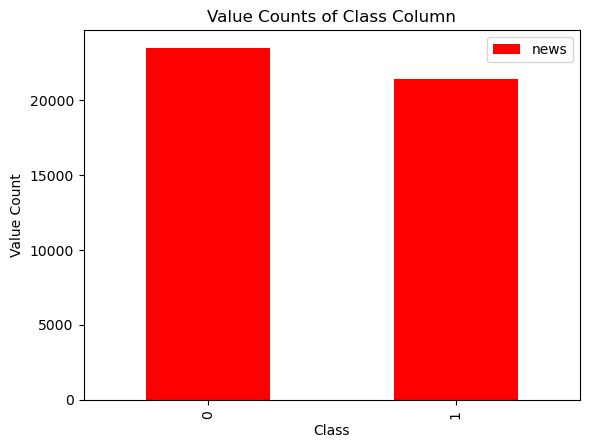

In [73]:
# Count of news by class Visualization
cc = fr.groupby('class').count()
cc.plot(kind='bar',color='Red')
plt.title('Value Counts of Class Column')
plt.ylabel('Value Count')
plt.xlabel('Class')
plt.show()


### WORD FREQUENCY

In [23]:
!pip install wordcloud
from wordcloud import WordCloud



In [74]:
# Combine all news for fake and real news
fake_news = fr[fr['class'] == 0]['news'].str.cat(sep=' ')
real_news = fr[fr['class'] == 1]['news'].str.cat(sep=' ')



In [75]:
# Remove stopwords
stop_words = set(stopwords.words('english'))
fake_words = [word for word in fake_news.split() if word.lower() not in stop_words]
real_words = [word for word in real_news.split() if word.lower() not in stop_words]

In [76]:

# Generate word clouds
fake_wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(' '.join(fake_words))
real_wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Blues').generate(' '.join(real_words))

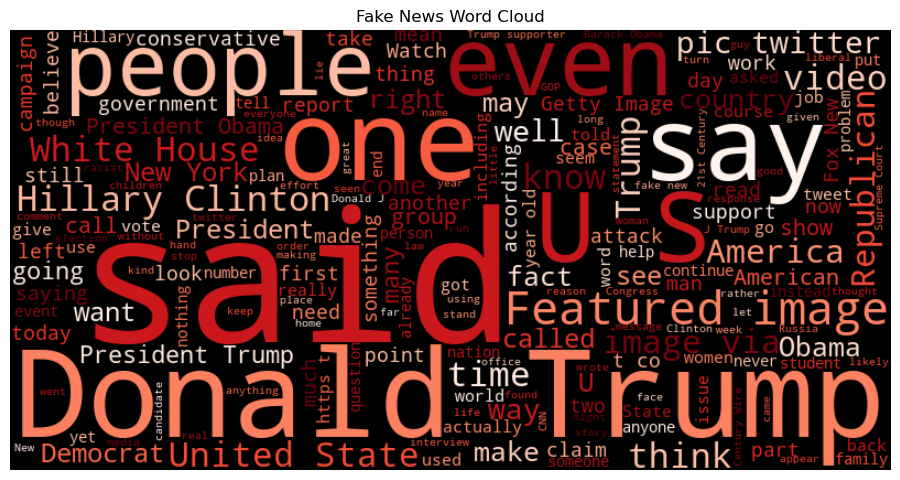

In [77]:
# Plot word cloud for fake news
plt.figure(figsize=(25, 10))

plt.subplot(1, 2, 1)
plt.imshow(fake_wordcloud, interpolation='bilinear')
plt.title('Fake News Word Cloud')
plt.axis('off')
plt.show()


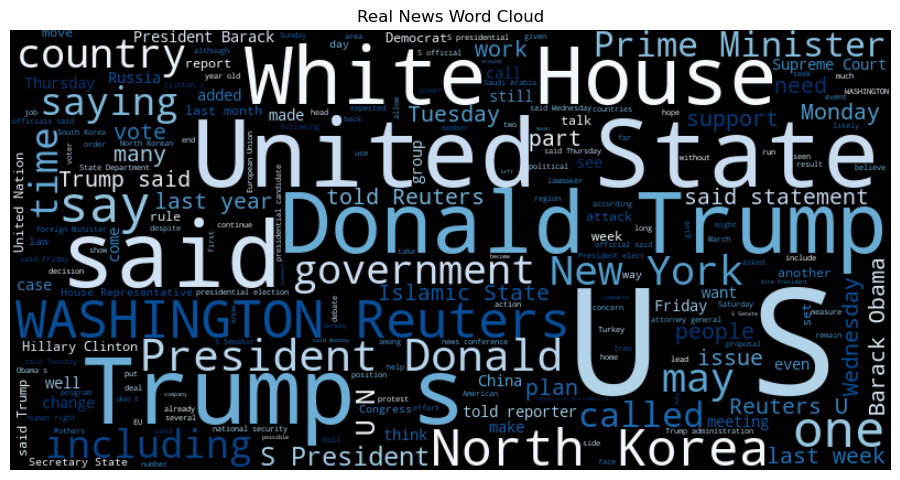

In [78]:
# Plot word cloud for real news
plt.figure(figsize=(25, 10))
plt.subplot(1, 2, 2)
plt.imshow(real_wordcloud, interpolation='bilinear')
plt.title('Real News Word Cloud')
plt.axis('off')
plt.show()

In [79]:
from collections import Counter

In [80]:
# Count word frequencies
fake_word_freq = Counter(fake_words)
real_word_freq = Counter(real_words)

In [81]:
# Convert to DataFrame for easier plotting
fake_word_freq_df = pd.DataFrame(fake_word_freq.most_common(25), columns=['Word', 'Frequency'])
real_word_freq_df = pd.DataFrame(real_word_freq.most_common(25), columns=['Word', 'Frequency'])

In [82]:
# List of fake_word_freq
fake_word_freq_df.head(10)

,Word,Frequency
0,Trump,70642
1,would,23053
2,people,21326
3,said,21123
4,one,19053
5,Donald,17475
6,Obama,17018
7,like,16362
8,Clinton,16146
9,President,15974


In [83]:
# List of real_word_freq
real_word_freq_df.head(10)

,Word,Frequency
0,said,72039
1,U.S.,42143
2,Trump,40861
3,would,31560
4,-,31413
5,said.,21582
6,(Reuters),21239
7,President,17206
8,also,15714
9,Republican,15111


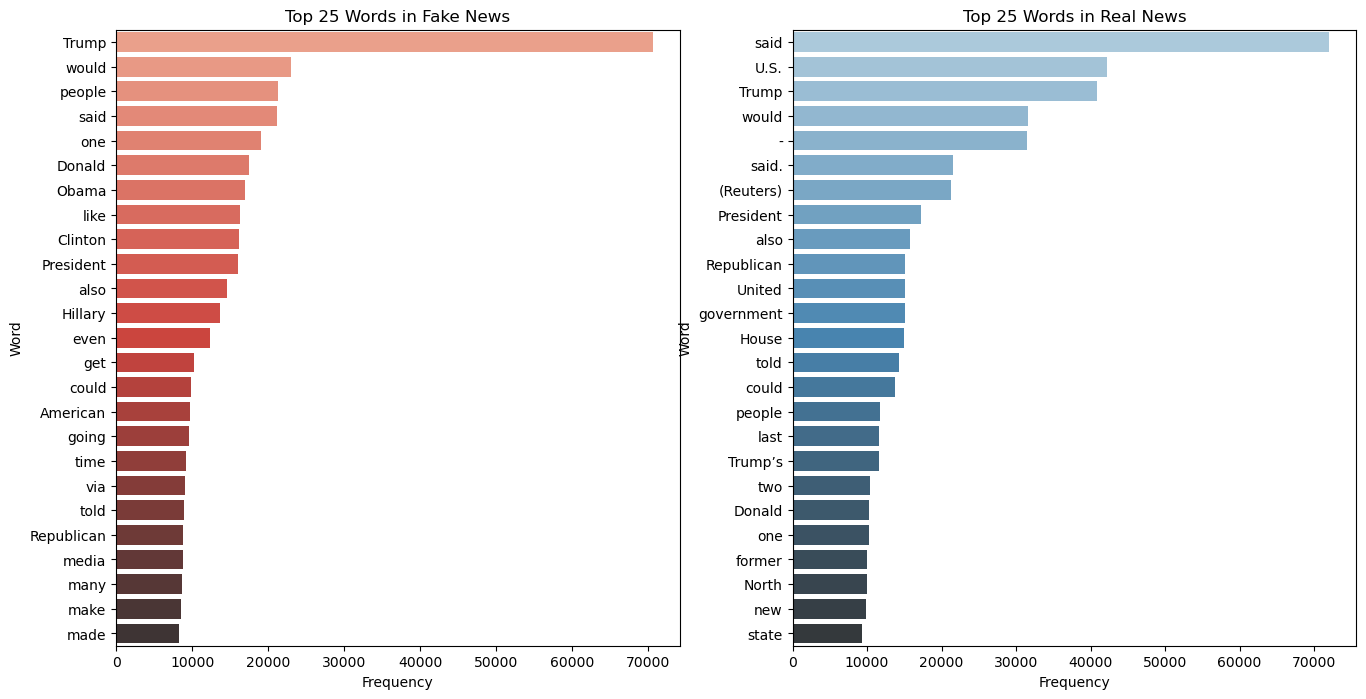

In [84]:
# Plot word frequencies
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
sns.barplot(x='Frequency', y='Word', data=fake_word_freq_df, hue='Word', palette='Reds_d', legend=False)
plt.title('Top 25 Words in Fake News')

plt.subplot(1, 2, 2)
sns.barplot(x='Frequency', y='Word', data=real_word_freq_df, hue='Word', palette='Blues_d', legend=False)
plt.title('Top 25 Words in Real News')

plt.show()

### NEWS LENGTH

In [104]:
FR= FR.sample(frac = 1)

In [108]:
FR.reset_index(drop=True, inplace=True)

In [109]:
news_len = FR[['news', 'class']]
news_len.head()

,news,class
0,Senior Palestinian figure Dahlan urges exit fr...,1
1,Death toll from fighting in South Sudan's Grea...,1
2,GOP Voters Declare #NeverTrump & #Republicans...,0
3,"Trump’s Broke, So He’s Breaking The Law To Ra...",0
4,Obama Eyeing Digital Media Career Post-Presid...,0


In [110]:
# Preprocess the text 
news_len.loc[:, 'news'] = news_len['news'].str.replace(r'[^\w\s]', '').str.lower()
news_len.head()

,news,class
0,senior palestinian figure dahlan urges exit fr...,1
1,death toll from fighting in south sudan's grea...,1
2,gop voters declare #nevertrump & #republicans...,0
3,"trump’s broke, so he’s breaking the law to ra...",0
4,obama eyeing digital media career post-presid...,0


In [114]:
# Calculate word counts
news_len.loc[:, 'word_count'] = news_len['news'].apply(lambda x: len(x.split()))
news_len.head()


,news,class,word_count
0,senior palestinian figure dahlan urges exit fr...,1,364
1,death toll from fighting in south sudan's grea...,1,323
2,gop voters declare #nevertrump & #republicans...,0,480
3,"trump’s broke, so he’s breaking the law to ra...",0,412
4,obama eyeing digital media career post-presid...,0,399


In [115]:
# Group by class and calculate average word counts
average_word_counts = news_len.groupby('class')['word_count'].mean()
print(average_word_counts)

class
0    437.930710
1    395.594574
Name: word_count, dtype: float64


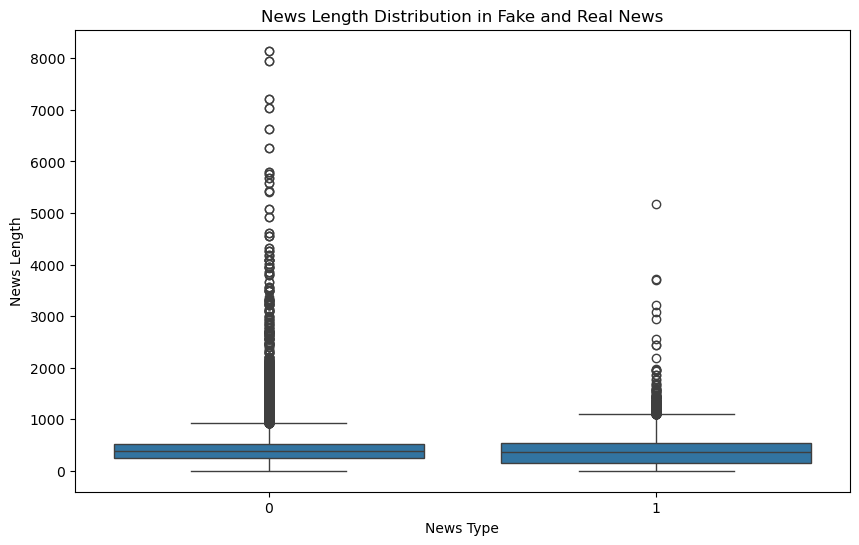

In [117]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='word_count', data=news_len)
plt.title('News Length Distribution in Fake and Real News')
plt.xlabel('News Type')
plt.ylabel('News Length')
plt.show()

### FEATURE ENGINEERING

In [48]:
#preprocessing using NLTK
stop_words = set(stopwords.words('english'))


#Tokenization, stopword removal $ stemming
def preprocess_news(news):
    token = word_tokenize(news)
    filtered_token = [word for word in token if word.lower() not in stop_words]
    lemmatizer = nltk.WordNetLemmatizer()
    lemma = [lemmatizer.lemmatize(word) for word in filtered_token]
    preprocessed_news = ' '.join(lemma)
    return preprocessed_news
    

In [121]:
#Feature extraction
fe = FR[['news', 'class']]
fe.head()

,news,class
0,Senior Palestinian figure Dahlan urges exit fr...,1
1,Death toll from fighting in South Sudan's Grea...,1
2,GOP Voters Declare #NeverTrump & #Republicans...,0
3,"Trump’s Broke, So He’s Breaking The Law To Ra...",0
4,Obama Eyeing Digital Media Career Post-Presid...,0


In [124]:
fe.loc[:, 'news_cleaned'] = fe['news'].apply(preprocess_news)


In [127]:
fe.head(10)

,news,class,news_cleaned
0,Senior Palestinian figure Dahlan urges exit fr...,1,Senior Palestinian figure Dahlan urge exit pea...
1,Death toll from fighting in South Sudan's Grea...,1,Death toll fighting South Sudan 's Great Lakes...
2,GOP Voters Declare #NeverTrump & #Republicans...,0,GOP Voters Declare # NeverTrump & # Republican...
3,"Trump’s Broke, So He’s Breaking The Law To Ra...",0,"Trump ’ Broke , ’ Breaking Law Raise Money sor..."
4,Obama Eyeing Digital Media Career Post-Presid...,0,Obama Eyeing Digital Media Career Post-Preside...
5,Israel’s Head Rabbi: Non-Jews Can Only Live I...,0,Israel ’ Head Rabbi : Non-Jews Live Israel ’ S...
6,"After Islamic State, ruined Raqqa fears new st...",1,"Islamic State , ruined Raqqa fear new strife R..."
7,BUSTED: YOUNG NJ DEMOCRAT CHAIRMAN CAUGHT PUNC...,0,BUSTED : YOUNG NJ DEMOCRAT CHAIRMAN CAUGHT PUN...
8,NANCY PELOSI Thanks Dreamers for Coming to U.S...,0,NANCY PELOSI Thanks Dreamers Coming U.S . Ille...
9,BORDER SHERIFF: The New Norm Is Lawless Wide O...,0,BORDER SHERIFF : New Norm Lawless Wide Open Bo...


In [129]:

def extract_pos_features(news):
    tokens = nltk.word_tokenize(news)
    pos_tags = nltk.pos_tag(tokens)
    return pos_tags

# Assuming fe is your DataFrame
features = fe['news_cleaned'].apply(extract_pos_features)
print(features)




0        [(Senior, JJ), (Palestinian, JJ), (figure, NN)...
1        [(Death, NNP), (toll, NN), (fighting, VBG), (S...
2        [(GOP, NNP), (Voters, NNP), (Declare, NNP), (#...
3        [(Trump, NNP), (’, NNP), (Broke, NNP), (,, ,),...
4        [(Obama, NNP), (Eyeing, NNP), (Digital, NNP), ...
                               ...                        
44893    [(Tunisia, NNP), (policeman, NN), (dy, NN), (a...
44894    [(Iraqi, NNP), (force, NN), (final, JJ), (assa...
44895    [(FBI, NNP), (CIA, NNP), (Host, NNP), (Job, NN...
44896    [(BOYCOTT, NNP), (MEDIA, NNP), (!, .), (Know, ...
44897    [(WHOA, NNP), (!, .), (NEW, NNP), (EMAILS, NNP...
Name: news_cleaned, Length: 44898, dtype: object


In [23]:
# Separate features and target
X = fr['text_cleaned']
y = fr['class']


### VECTORIZATION (TF- IDF)

In [24]:
# Convert text data to numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(X)


In [20]:
from sklearn.decomposition import PCA


In [91]:
# Apply PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(X_tfidf.toarray())


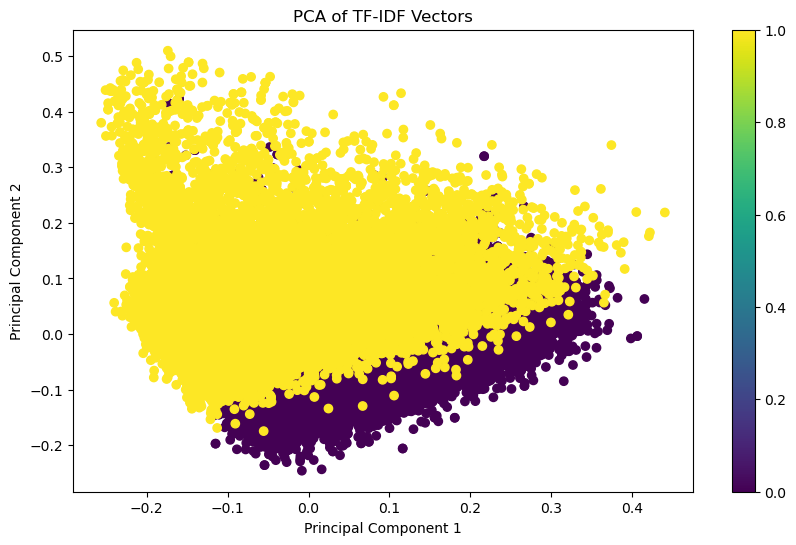

In [129]:
# Plot the PCA result
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y, cmap='viridis')
plt.colorbar(scatter)
plt.title('PCA of TF-IDF Vectors')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [94]:
from sklearn.manifold import TSNE

In [95]:
# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
x_tsne = tsne.fit_transform(X_tfidf.toarray())

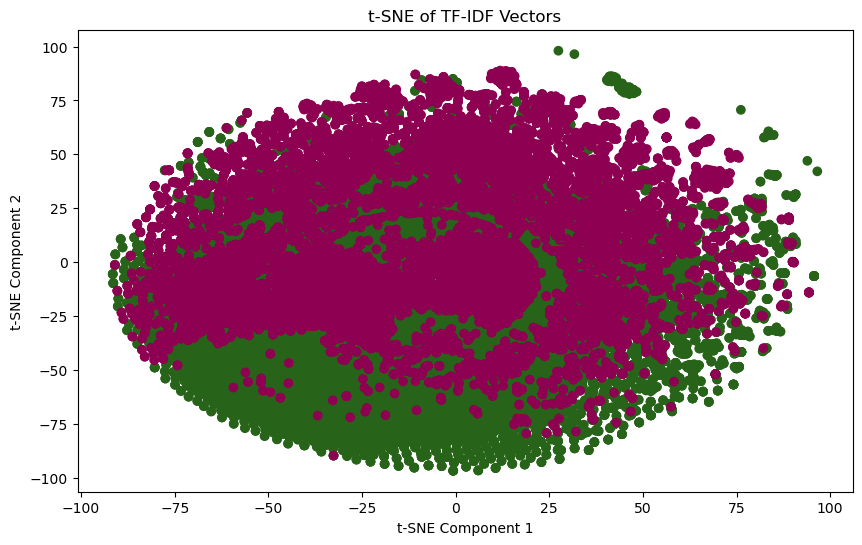

In [131]:
# Plot the t-SNE result
plt.figure(figsize=(10, 6))
plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=y, cmap='PiYG_r')
plt.title('t-SNE of TF-IDF Vectors')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


### SPLIT DATA FOR TRAINING AND TESTING

In [25]:


X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)


In [26]:
y_train_fr = pd.DataFrame(y_train, columns=['class'])


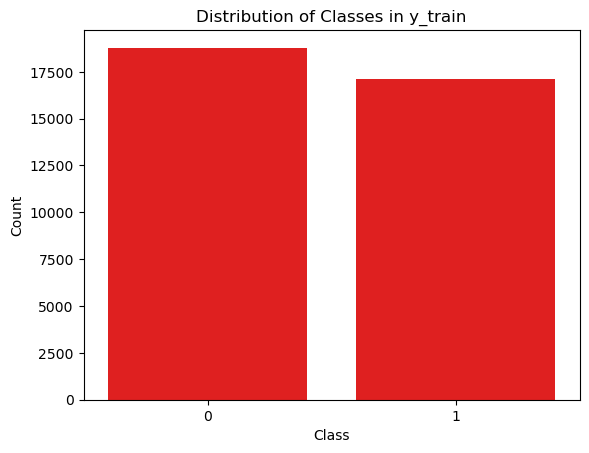

In [135]:

# Plot the distribution of classes
sns.countplot(x='class', data=y_train_fr, color='Red')
plt.title('Distribution of Classes in y_train')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

### SMOTE
Balance the training data

In [27]:
from imblearn.over_sampling import SMOTE

In [28]:
smote = SMOTE(random_state = 42, k_neighbors=5)

In [29]:
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [30]:
y_train_res_fr = pd.DataFrame(y_train_res, columns = ['class'])

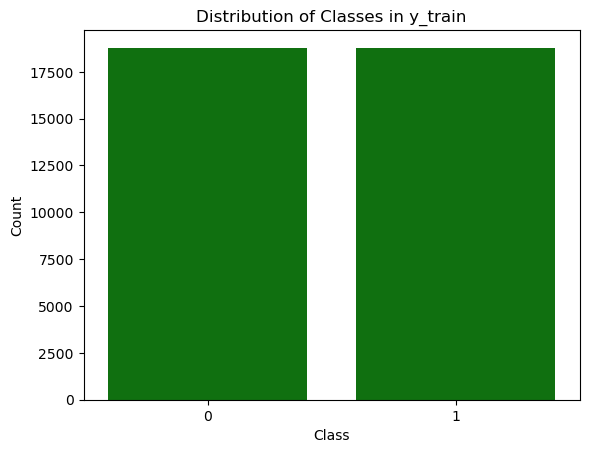

In [31]:
# Plot the distribution of classes
sns.countplot(x='class', data=y_train_res_fr, color='Green')
plt.title('Distribution of Classes in y_train')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

### TRAIN AND TEST THE DATA

In [32]:
lr = LogisticRegression()

In [33]:
lr.fit(X_train_res, y_train_res)

LogisticRegression()

In [34]:
print('The accuracy score of lr is:', lr.score(X_test, y_test))

The accuracy score of lr is: 0.9908685968819599


In [35]:
pred_lr = lr.predict(X_test)
print(pred_lr)

[1 1 0 ... 1 1 0]


In [85]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4696
           1       0.99      0.99      0.99      4284

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [86]:
report_dict = classification_report(y_test, pred_lr, output_dict=True)


In [87]:
# Select only the desired columns and rows from the dictionary
data = []
for key, values in report_dict.items():
  if key in ["precision", "recall", "f1-score", "support"]:  # Select relevant keys
    data.append([key] + values[:-1])  # Exclude the last element (support)



In [92]:
# Create the DataFrame with appropriate column names 
report_df = pd.DataFrame(data, columns=["", "Precision", "Recall", "F1-score"])


In [93]:
# Generate the classification report
report = classification_report(y_test, pred_lr, output_dict=True)


In [94]:
# Convert the classification report to a DataFrame
report_df = pd.DataFrame(report).transpose()


In [95]:
# Ensure the data is numeric
report_df = report_df.apply(pd.to_numeric, errors='coerce')


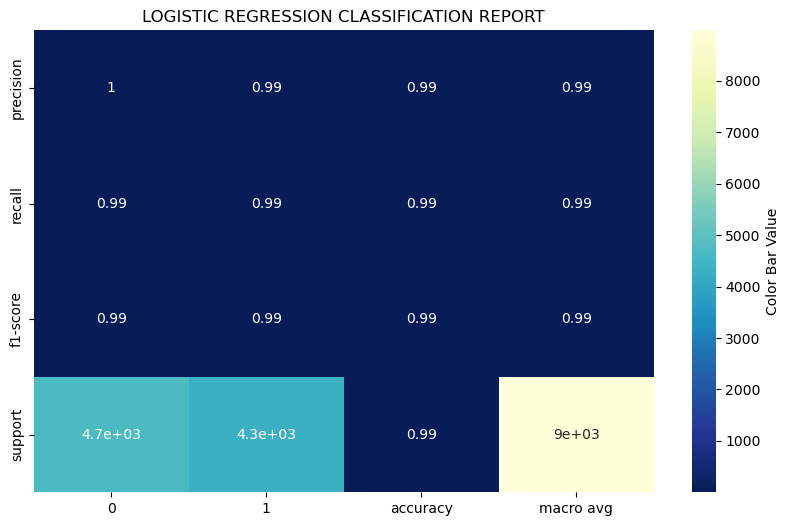

In [98]:
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap='YlGnBu_r', cbar_kws={'label':'Color Bar Value'})
plt.title('LOGISTIC REGRESSION CLASSIFICATION REPORT')
plt.show()


In [34]:
print(confusion_matrix(pred_lr, y_test))

[[4642   24]
 [  54 4260]]


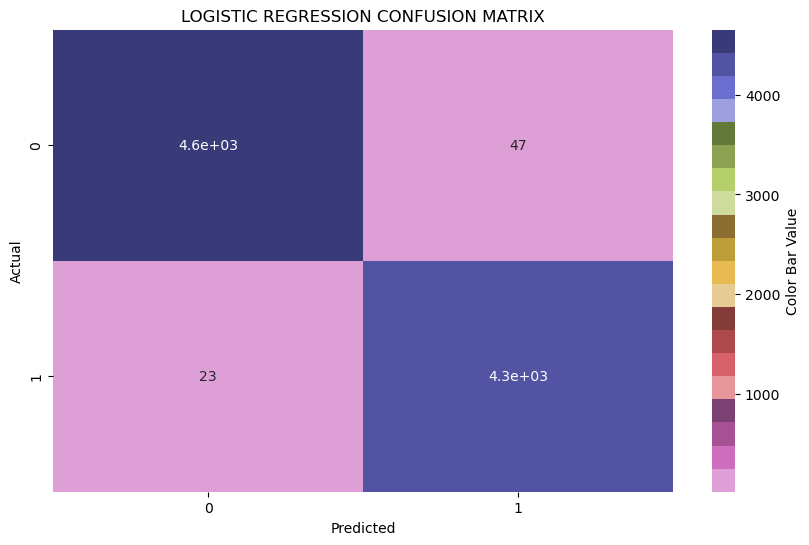

In [97]:
cml = confusion_matrix(y_test, pred_lr)
plt.figure(figsize = (10,6))
sns.heatmap(cml, cmap = 'tab20b_r', annot = True, cbar_kws={'label':'Color Bar Value'})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('LOGISTIC REGRESSION CONFUSION MATRIX')
plt.show()

In [36]:
from sklearn.svm import SVC


In [37]:
sv = SVC()

In [38]:
sv.fit(X_train_res, y_train_res)

SVC()

In [39]:
print('The accuracy score of svm is:', sv.score(X_test, y_test))

The accuracy score of svm is: 0.9959910913140312


In [40]:
pred_sv = sv.predict(X_test)

In [41]:
print(classification_report(pred_sv, y_test))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4687
           1       1.00      0.99      1.00      4293

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



In [32]:
# Generate the classification report
report_dict_sv = classification_report(y_test, pred_sv, output_dict=True)


In [34]:
# Select only the desired columns and rows from the dictionary
data_sv = []
for key, values in report_dict_sv.items():
  if key in ["precision", "recall", "f1-score", "support"]:  # Select relevant keys
    data.append([key] + values[:-1])  # Exclude the last element (support)


In [35]:
# Create the DataFrame with appropriate column names 
report_df_sv = pd.DataFrame(data_sv, columns=["", "Precision", "Recall", "F1-score"])


In [44]:
# Generate the classification report
report_sv = classification_report(y_test, pred_sv, output_dict=True)


In [45]:
# Convert the classification report to a DataFrame
report_df_sv = pd.DataFrame(report_sv).transpose()

In [46]:
# Ensure the data is numeric
report_df_sv = report_df_sv.apply(pd.to_numeric, errors='coerce')


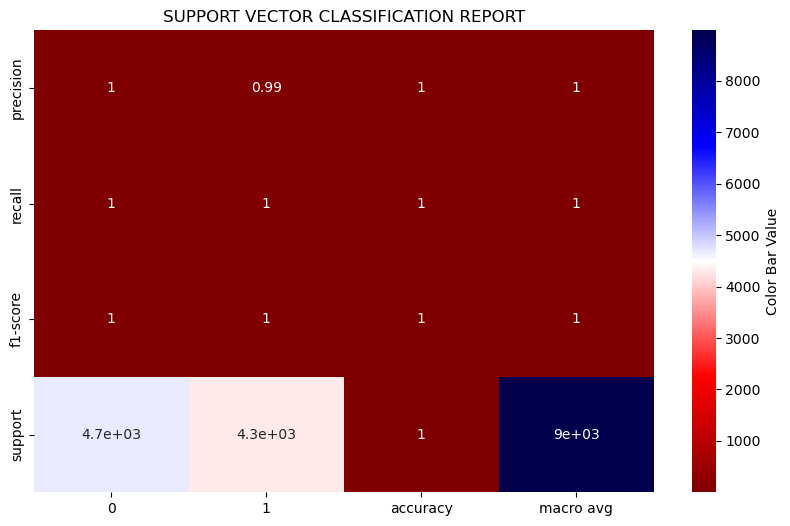

In [99]:
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df_sv.iloc[:-1, :].T, annot=True, cmap='seismic_r', cbar_kws={'label':'Color Bar Value'})
plt.title('SUPPORT VECTOR CLASSIFICATION REPORT')
plt.show()

In [42]:
print(confusion_matrix(pred_sv, y_test))

[[4672   15]
 [  24 4269]]


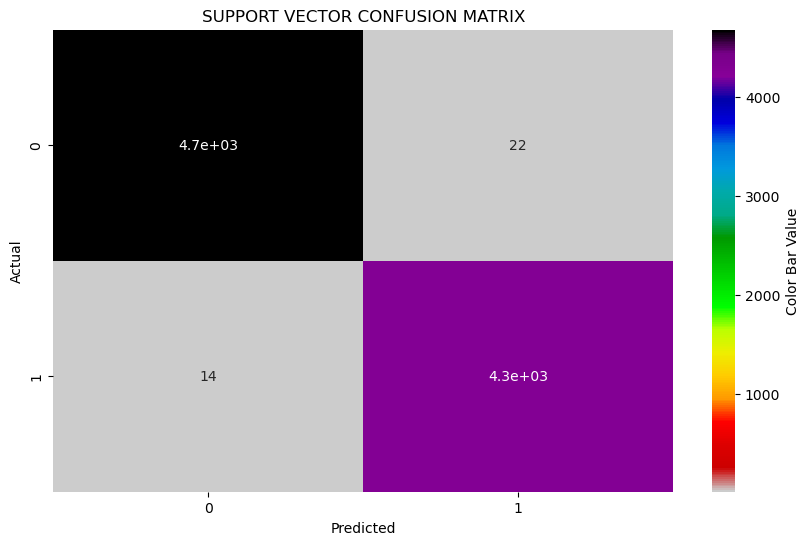

In [73]:
cms = confusion_matrix(y_test, pred_sv)
plt.figure(figsize = (10,6))
sns.heatmap(cms, cmap = 'nipy_spectral_r', annot = True, cbar_kws={'label':'Color Bar Value'})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SUPPORT VECTOR CONFUSION MATRIX')
plt.show()

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
rf = RandomForestClassifier()
rf.fit(X_train_res, y_train_res)

RandomForestClassifier()

In [43]:
print('The accuracy score of rf is:', rf.score(X_test, y_test))


The accuracy score of rf is: 0.9988864142538976


In [44]:
pred_rf = rf.predict(X_test)

In [57]:
print(classification_report(pred_rf, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4697
           1       1.00      1.00      1.00      4283

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



In [62]:
# Generate the classification report
report_dict_rf = classification_report(y_test, pred_rf, output_dict=True)


In [63]:
# Select only the desired columns and rows from the dictionary
data_rf = []
for key, values in report_dict_rf.items():
  if key in ["precision", "recall", "f1-score", "support"]:  # Select relevant keys
    data.append([key] + values[:-1])  # Exclude the last element (support)

In [64]:
# Create the DataFrame with appropriate column names 
report_df_rf = pd.DataFrame(data_rf, columns=["", "Precision", "Recall", "F1-score"])

In [65]:
# Generate the classification report
report_rf = classification_report(y_test, pred_rf, output_dict=True)

In [66]:
# Convert the classification report to a DataFrame
report_df_rf = pd.DataFrame(report_rf).transpose()

In [68]:
# Ensure the data is numeric
report_df_rf = report_df_rf.apply(pd.to_numeric, errors='coerce')


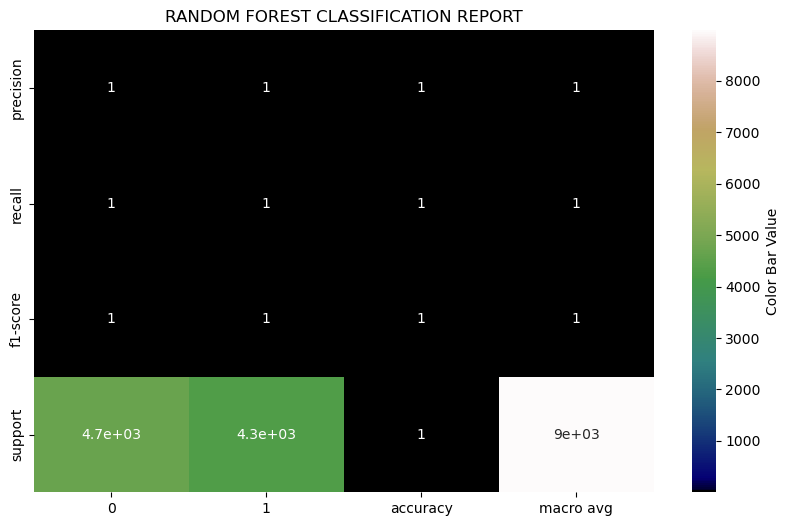

In [100]:
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df_rf.iloc[:-1, :].T, annot=True, cmap='gist_earth', cbar_kws={'label':'Color Bar Value'})
plt.title('RANDOM FOREST CLASSIFICATION REPORT')
plt.show()

In [49]:
print(confusion_matrix(pred_lr, y_test))

[[4642   24]
 [  54 4260]]


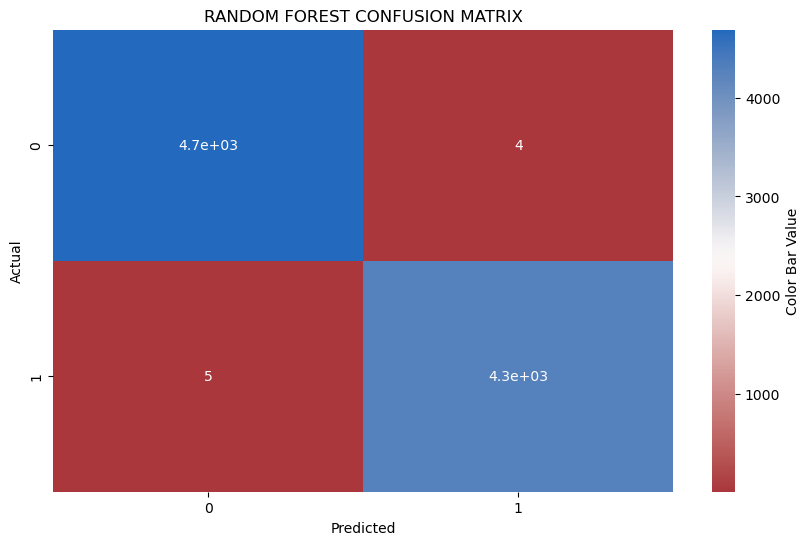

In [80]:
cmr = confusion_matrix(y_test, pred_rf)
plt.figure(figsize = (10,6))
sns.heatmap(cmr, cmap = 'vlag_r', annot = True, cbar_kws={'label':'Color Bar Value'})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('RANDOM FOREST CONFUSION MATRIX')
plt.show()

In [45]:
def output_label(n):
    if n == 0:
        return 'The news is fake'
    elif n == 1:
        return 'This news is true'
   
    
def news_detector(news):
    texting_news = {'text':[news]}
    new_def_test = pd.DataFrame(texting_news)
    new_def_test['text'] = new_def_test['text'].apply(preprocess_text)
    X_test = new_def_test['text']
    new_Xv_test = vectorizer.transform(X_test)
    pred_lr = lr.predict(new_Xv_test)
    pred_rf = rf.predict(new_Xv_test)
    pred_sv = sv.predict(new_Xv_test)
    return print('\n\nlr prediction: {} \nrf prediction: {} \nsv prediction: {}'.format(output_label(pred_lr[0]),
                                                                                                        
                                                                                        output_label(pred_rf[0]),
                                                                                     output_label(pred_sv[0])))


In [106]:
news = str(input())
news_detector(news)


 BRUSSELS (Reuters) - NATO allies on Tuesday welcomed President Donald Trump s decision to commit more forces to Afghanistan, as part of a new U.S. strategy he said would require more troops and funding from America s partners. Having run for the White House last year on a pledge to withdraw swiftly from Afghanistan, Trump reversed course on Monday and promised a stepped-up military campaign against  Taliban insurgents, saying:  Our troops will fight to win .  U.S. officials said he had signed off on plans to send about 4,000 more U.S. troops to add to the roughly 8,400 now deployed in Afghanistan. But his speech did not define benchmarks for successfully ending the war that began with the U.S.-led invasion of Afghanistan in 2001, and which he acknowledged had required an   extraordinary sacrifice of blood and treasure .  We will ask our NATO allies and global partners to support our new strategy, with additional troops and funding increases in line with our own. We are confident they 



lr prediction: This news is true 
rf prediction: This news is true 
sv prediction: This news is true


In [107]:
news = str(input())
fake_news_detector(news)


 Vic Bishop Waking TimesOur reality is carefully constructed by powerful corporate, political and special interest sources in order to covertly sway public opinion. Blatant lies are often televised regarding terrorism, food, war, health, etc. They are fashioned to sway public opinion and condition viewers to accept what have become destructive societal norms.The practice of manipulating and controlling public opinion with distorted media messages has become so common that there is a whole industry formed around this. The entire role of this brainwashing industry is to figure out how to spin information to journalists, similar to the lobbying of government. It is never really clear just how much truth the journalists receive because the news industry has become complacent. The messages that it presents are shaped by corporate powers who often spend millions on advertising with the six conglomerates that own 90% of the media:General Electric (GE), News-Corp, Disney, Viacom, Time Warner, 



lr prediction: The news is fake 
rf prediction: The news is fake 
sv prediction: The news is fake


In [108]:
news = str(input())
fake_news_detector(news)


 SAO PAULO (Reuters) - Cesar Mata Pires, the owner and co-founder of Brazilian engineering conglomerate OAS SA, one of the largest companies involved in Brazil s corruption scandal, died on Tuesday. He was 68. Mata Pires died of a heart attack while taking a morning walk in an upscale district of S o Paulo, where OAS is based, a person with direct knowledge of the matter said. Efforts to contact his family were unsuccessful. OAS declined to comment. The son of a wealthy cattle rancher in the northeastern state of Bahia, Mata Pires  links to politicians were central to the expansion of OAS, which became Brazil s No. 4 builder earlier this decade, people familiar with his career told Reuters last year. His big break came when he befriended Antonio Carlos Magalh es, a popular politician who was Bahia governor several times, and eventually married his daughter Tereza. Brazilians joked that OAS stood for  Obras Arranjadas pelo Sogro  - or  Work Arranged by the Father-In-Law.   After years o



lr prediction: This news is true 
rf prediction: This news is true 
sv prediction: This news is true


In [49]:
news = str(input())
news_detector(news)

 Deputy Speaker, House of Representatives, Rt. Hon. Benjamin Okezie Kalu has expressed an extravagant gratitude to the President of the Federal Republic of Nigeria, His Excellency, Senator Ahmed Bola Tinubu, GCFR, for signing the South East Development Commission (SEDC) bill into law, thereby approving the creation of the commission. It will be recalled that the bill was sponsored by Kalu and all the lawmakers from the south east region from the House of Representatives. The bill sought to establish a commission that will be charged with the responsibility to receive and manage fund from allocation of the federation account for the reconstruction and rehabilitation of roads, houses and other infrastructural damage suffered by the region as a result of the effect of the civil war after 54 years. The commission will as well tackle the ecological problems and any other related environmental or developmental challenges in the Southeast States which include Abia, Imo, Enugu, Anambra and Ebo



lr prediction: This news is true 
rf prediction: The news is fake 
sv prediction: This news is true


In [48]:
news = str(input())
news_detector(news)

 Former vice president, Atiku Abubakar has condemned attempts by the federal government and security agencies to scuttle the nationwide protests planned to take place from August 1.  Vanguard reports that plans are in motion to stage nationwide protests against bad governance, the current economic hardship, and a range of issues.Taking to his verified Facebook page on Tuesday, the 2023 presidential candidate under the Peoples’ Democratic Party, PDP, expressed concern that even supporters of President Bola Tinubu and the ruling APC are not left out of the hardship. Taking to his verified Facebook page on Tuesday, the 2023 presidential candidate under the Peoples’ Democratic Party, PDP, expressed concern that even supporters of President Bola Tinubu and the ruling APC are not left out of the hardship.




lr prediction: This news is true 
rf prediction: The news is fake 
sv prediction: This news is true


In [51]:
news = str(input())
news_detector(news)

 The President of the Senate, Godswill Akpabio has apologized to his colleague, Sen. Natasha Akpoti-Uduaghan, over comments he made while shutting her down during plenary last week. The Senate President had told Akpoti-Uduaghan not to speak without him recognizing her to do so. Adding, the Senate is not a “nightclub”. His comments caused a storm on social media with various women’s groups calling him out for being sexist and insulting women. In his apology, which he tendered during Tuesday’s plenary, Akpabio said he would never intentionally denigrate any woman. He said, “I will not intentionally denigrate any woman and I always pray that God will uplift women. “Distinguished Senator Natasha, I want to apologise to you. “The interest shown In the social media shows that we have enemies. I felt I should tender a public apology to you. I do not mean any harm. People should concentrate on things that will move this country forward “Social media handlers should practice with decorum. We wo



lr prediction: This news is true 
rf prediction: The news is fake 
sv prediction: This news is true


In [53]:
news = str(input())
news_detector(news)

 Former Edo State House of Assembly aspirant in Etsako East Local Government, Ilugbekhai Inwomoh, has urged people of Edo State to vote Dr Asue Ighodalo, who he described as another Obafemi Awolowo in the September 21 governorship election in Edo State. Ilugbehai, who is a member of The Advisory Council (New Media) in the PDP Campaign Council, described Ighodalo as a modern Awolowo, who will project public interest above personal aggrandizement. He said: “When Awolowo was alive, he lived and dreamed of people’s welfare and development. The western region was a pacesetter under him. Just as Edo is currently a pacesetter in Nigeria in terms of development, security and highest salary for civil servants under Governor Godwin Obaseki in PDP administration when other opposition states and the federal government are still struggling to pay what Edo government is paying with ease.” llugbehai maintained that Awolowo introduced the first television in Africa at a time when some European countri



lr prediction: This news is true 
rf prediction: The news is fake 
sv prediction: The news is fake


In [54]:
news = str(input())
news_detector(news)


 EARLIER this year Françoise Hardy, a French musician, appeared in a YouTube video (see link). She is asked, by a presenter off-screen, why President Donald Trump sent his press secretary, Sean Spicer, to lie about the size of the inauguration crowd. First, Ms Hardy argues. Then she says Mr Spicer “gave alternative facts to that”. It’s all a little odd, not least because Françoise Hardy (pictured), who is now 73, looks only 20, and the voice coming out of her mouth belongs to Kellyanne Conway, an adviser to Mr Trump.  The video, called “Alternative Face v1.1”, is the work of Mario Klingemann, a German artist. It plays audio from an NBC interview with Ms Conway through the mouth of Ms Hardy’s digital ghost. The video is wobbly and pixelated; a competent visual-effects shop could do much better. But Mr Klingemann did not fiddle with editing software to make it. Instead, he took only a few days to create the clip on a desktop computer using a generative adversarial network (GAN), a type o



lr prediction: The news is fake 
rf prediction: The news is fake 
sv prediction: The news is fake


In [55]:
news = str(input())
news_detector(news)

 NEONICOTINOIDS are so good at killing things which suck the sap and chew the flesh of crops that they have become the world’s most widely used family of insecticides. For decades, though, there has been a fear that they harm non-crop-eating insects, too—in particular, bees.  The evidence for this has been mixed. Swedish research published in 2015—two years after the EU imposed a moratorium on the use of three popular neonicotinoids, clothianidin, imidacloprid and thiamethoxam—found that wild bees in fields sown with neonicotinoid-treated oilseed rape (canola) reproduced poorly. Yet other field studies have found no discernible effects on either wild-bee or honeybee populations. Two studies published in Science on June 30th add to the case against.




lr prediction: The news is fake 
rf prediction: The news is fake 
sv prediction: The news is fake


In [57]:
news = str(input())
news_detector(news)

 Danica Sotto-Pingris, actress and wife of former PBA player Marc Pingris will sue cyber libel against the netizens and vloggers who first spreading fake news about her husband and family. Months ago, basketball hooper Marc Pingris and actress Kim Rodriguez were talked of the town with their same locations of both celebrity photos and videos, it went viral on social media, gathered from their personal Instagrams and posted by netizens and vloggers with caption and speculations that both are secretly dating and having an affair.  Last March, Kim Rodriguez broke her silence and told her manager Ogie Diaz that those allegations were not true about her and Marc Pingris that they were together because of work, promoting the team. Rodriguez explained every details of the photos that went viral on our last Glitter Channel Entertainment article.  According to our source, Danica Sotto-Pingris, wife of Marc will sue cyber liber (Cybercrime Prevention Act of 2012) to those who are responsible for



lr prediction: The news is fake 
rf prediction: The news is fake 
sv prediction: The news is fake
